In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/AI-DATASETS/diabetes.csv")

Regression Task:
Mean Squared Error: 402.8523890426408
Mean Absolute Error: 12.599886476449647
R-squared: 0.19403775986668126


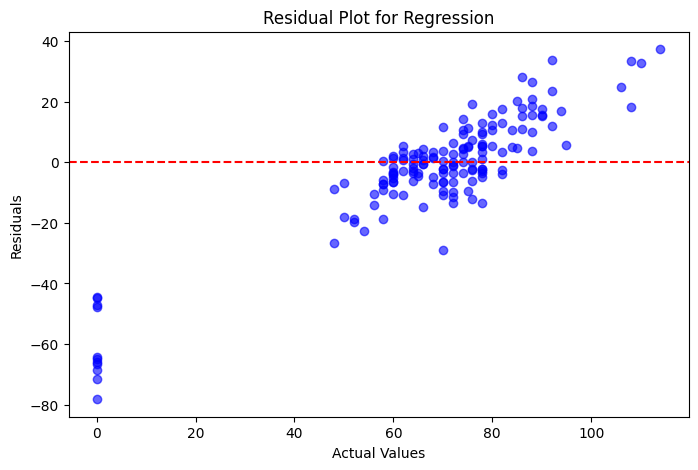

Feature Importance (Regression):
                    Feature  Coefficient
6                       Age     4.636910
4                       BMI     3.892890
2             SkinThickness     3.008316
1                   Glucose     1.914569
0               Pregnancies     0.619822
5  DiabetesPedigreeFunction    -0.125459
3                   Insulin    -0.598626
7                   Outcome    -2.013122

Classification Task (Logistic Regression):
Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Classification Task (KNN):
Accuracy: 0.6883116883116883
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80     

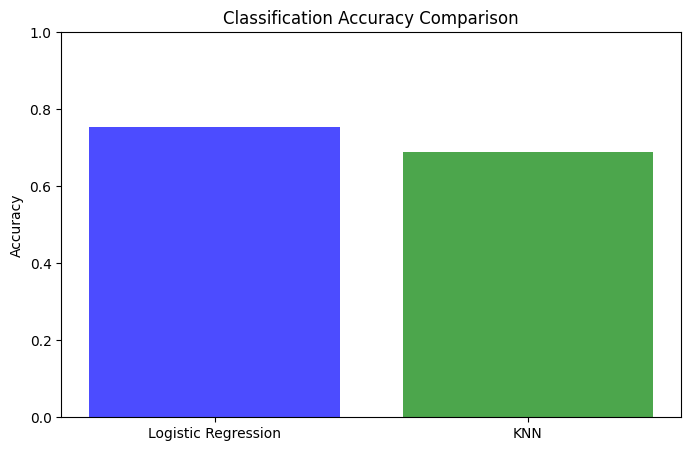

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
import matplotlib.pyplot as plt


# Regression Task: Predict BloodPressure
X_reg = data.drop(columns=["BloodPressure"])
y_reg = data["BloodPressure"]

# Scale the features
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Split the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predictions for regression
y_pred_reg = reg_model.predict(X_test_reg)

# Regression Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression Task:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_test_reg - y_pred_reg, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Regression')
plt.show()

# Feature Importance for Regression
feature_importance_reg = pd.DataFrame({
    'Feature': X_reg.columns,
    'Coefficient': reg_model.coef_
})
print("Feature Importance (Regression):")
print(feature_importance_reg.sort_values(by='Coefficient', ascending=False))

# Classification Task: Predict Outcome
X_clf = data.drop(columns=["Outcome"])
y_clf = data["Outcome"]

# Scale the features
X_clf_scaled = scaler.fit_transform(X_clf)

# Split the data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_clf, y_train_clf)

# Predictions for classification (Logistic Regression)
y_pred_clf_log = log_reg_model.predict(X_test_clf)

# Logistic Regression Metrics
print("\nClassification Task (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf_log))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_log))

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_clf, y_train_clf)

# Predictions for classification (KNN)
y_pred_clf_knn = knn_model.predict(X_test_clf)

# KNN Metrics
print("\nClassification Task (KNN):")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf_knn))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_knn))

# Visualizing Comparison (Logistic Regression vs KNN)
methods = ['Logistic Regression', 'KNN']
accuracies = [accuracy_score(y_test_clf, y_pred_clf_log), accuracy_score(y_test_clf, y_pred_clf_knn)]

plt.figure(figsize=(8, 5))
plt.bar(methods, accuracies, color=['blue', 'green'], alpha=0.7)
plt.ylabel('Accuracy')
plt.title('Classification Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
